In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [55]:
df = pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [56]:
df.rename(columns={'listed_in':'genre'},inplace=True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

In [57]:
df.drop(columns='show_id',inplace=True)

In [58]:
df.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
genre              0
description        0
dtype: int64

In [59]:
df.dropna(subset =['date_added'],inplace=True)
df['date_added'].isna().sum()

0

In [60]:
df.dropna(subset=['rating'],inplace=True)
df['rating'].isna().sum()

0

In [61]:
df.dropna(subset=['duration'],inplace=True)
df['duration'].isna().sum()

0

In [62]:
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      6169 non-null   object        
 3   cast          7965 non-null   object        
 4   country       7961 non-null   object        
 5   date_added    8702 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   genre         8790 non-null   object        
 10  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 824.1+ KB


In [63]:
df['day']=df['date_added'].dt.day
df['month']=df['date_added'].dt.month
df['year']=df['date_added'].dt.year
df['month_name']=df['date_added'].dt.month_name()
df['weekday']=df['date_added'].dt.day_name()
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0,September,Friday


In [64]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [65]:
df['rating']=df['rating'].replace(['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],'Kids')
df['rating']=df['rating'].replace(['PG-13','TV-14'],'Teens')
df['rating']=df['rating'].replace(['R','TV-MA','NC-17'],'Adults')
df['rating']=df['rating'].replace(['NR','UR'],np.NaN)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0,September,Friday


In [66]:
df['rating'].unique()

array(['Teens', 'Adults', 'Kids', nan], dtype=object)

In [67]:
df['rating'].isna().sum()

82

In [68]:
df.dropna(subset=['rating'],inplace=True)
df['rating'].isna().sum()

0

In [69]:
df[(df['director'].isna()) & (df['country'].isna()) & (df['cast'].isna())].shape[0]

96

In [70]:
df.dropna(subset=['director','country','cast'],how='all',inplace=True)
df.shape

(8612, 16)

In [71]:
df_cast=pd.DataFrame(df['cast'].apply(lambda x:str(x).split(', ')).tolist(),index=df['title'])
df_cast

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
Midnight Mass,Kate Siegel,Zach Gilford,Hamish Linklater,Henry Thomas,Kristin Lehman,Samantha Sloyan,Igby Rigney,Rahul Kohli,Annarah Cymone,Annabeth Gish,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zinzana,Ali Suliman,Saleh Bakri,Yasa,Ali Al-Jabri,Mansoor Alfeeli,Ahd,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Zodiac,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
Zombieland,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [72]:
df_cast=df_cast.stack()
df_cast

title                  
Dick Johnson Is Dead  0                      nan
Blood & Water         0               Ama Qamata
                      1              Khosi Ngema
                      2            Gail Mabalane
                      3           Thabang Molaba
                                   ...          
Zubaan                3         Manish Chaudhary
                      4             Meghna Malik
                      5            Malkeet Rauni
                      6           Anita Shabdish
                      7    Chittaranjan Tripathy
Length: 64251, dtype: object

In [73]:
df_cast=pd.DataFrame(df_cast)
df_cast

0
title                                        
Dick Johnson Is Dead 0                    nan
Blood & Water        0             Ama Qamata
                     1            Khosi Ngema
                     2          Gail Mabalane
                     3         Thabang Molaba
...                                       ...
Zubaan               3       Manish Chaudhary
                     4           Meghna Malik
                     5          Malkeet Rauni
                     6         Anita Shabdish
                     7  Chittaranjan Tripathy

[64251 rows x 1 columns]

In [74]:
df_cast.reset_index(inplace=True)
df_cast

,title,level_1,0
0,Dick Johnson Is Dead,0,nan
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba
...,...,...,...
64246,Zubaan,3,Manish Chaudhary
64247,Zubaan,4,Meghna Malik
64248,Zubaan,5,Malkeet Rauni
64249,Zubaan,6,Anita Shabdish


In [75]:
df_cast=df_cast[['title',0]]
df_cast

,title,0
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64246,Zubaan,Manish Chaudhary
64247,Zubaan,Meghna Malik
64248,Zubaan,Malkeet Rauni
64249,Zubaan,Anita Shabdish


In [76]:
df_cast.columns=['title','cast']
df_cast.replace('nan',np.nan,inplace=True)
df_cast.isna().sum()

C:\Users\welcome\AppData\Local\Temp\ipykernel_5268\3721954205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cast.replace('nan',np.nan,inplace=True)


title      0
cast     712
dtype: int64

In [77]:
df_genre=pd.DataFrame(df['genre'].apply(lambda x:str(x).split(', ')).tolist(),index=df['title'])
df_genre=df_genre.stack()
df_genre=pd.DataFrame(df_genre)
df_genre.reset_index(inplace=True)
df_genre=df_genre[['title',0]]
df_genre.columns=['title','genre']
df_genre.replace('nan',np.nan,inplace=True)
df_genre.isna().sum()

title    0
genre    0
dtype: int64

In [78]:
df_director=pd.DataFrame(df['director'].apply(lambda x:str(x).split(', ')).tolist(),index=df['title'])
df_director=df_director.stack()
df_director=pd.DataFrame(df_director)
df_director.reset_index(inplace=True)
df_director=df_director[['title',0]]
df_director.columns=['title','director']
df_director.replace('nan',np.nan,inplace=True)
df_director.isna().sum()

title          0
director    2521
dtype: int64

In [79]:
df_country = pd.DataFrame(df['country'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_country = df_country.stack()
df_country = pd.DataFrame(df_country)
df_country.reset_index(inplace=True)
df_country = df_country[['title',0]]
df_country.columns =['title','country']
df_country.replace('nan',np.NaN,inplace=True)
df_country.isna().sum()

title        0
country    733
dtype: int64

In [80]:
df12=df_cast.merge(df_genre, on='title')
df12

,title,cast,genre
0,Dick Johnson Is Dead,NaN,Documentaries
1,Blood & Water,Ama Qamata,International TV Shows
2,Blood & Water,Ama Qamata,TV Dramas
3,Blood & Water,Ama Qamata,TV Mysteries
4,Blood & Water,Khosi Ngema,International TV Shows
...,...,...,...
147927,Zubaan,Anita Shabdish,International Movies
147928,Zubaan,Anita Shabdish,Music & Musicals
147929,Zubaan,Chittaranjan Tripathy,Dramas
147930,Zubaan,Chittaranjan Tripathy,International Movies


In [81]:
df123=df_director.merge(df12, on='title')
df123

,title,director,cast,genre
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,NaN,Ama Qamata,International TV Shows
2,Blood & Water,NaN,Ama Qamata,TV Dramas
3,Blood & Water,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...
159583,Zubaan,Mozez Singh,Anita Shabdish,International Movies
159584,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals
159585,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas
159586,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies


In [82]:
df1234=df_country.merge(df123, on='title')
df1234

,title,country,director,cast,genre
0,Dick Johnson Is Dead,United States,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,South Africa,NaN,Ama Qamata,International TV Shows
2,Blood & Water,South Africa,NaN,Ama Qamata,TV Dramas
3,Blood & Water,South Africa,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...
199945,Zubaan,India,Mozez Singh,Anita Shabdish,International Movies
199946,Zubaan,India,Mozez Singh,Anita Shabdish,Music & Musicals
199947,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,Dramas
199948,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [83]:
df_new=df.merge(df1234,on='title')
df_new

,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,genre_x,description,day,month,year,month_name,weekday,country_y,director_y,cast_y,genre_y
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199945,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday,India,Mozez Singh,Anita Shabdish,International Movies
199946,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday,India,Mozez Singh,Anita Shabdish,Music & Musicals
199947,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,Dramas
199948,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [84]:
df_new.drop(columns=['cast_x','country_x','director_x','genre_x'],inplace=True)
df_new.rename(columns={'country_y':'country','director_y':'director','cast_y':'cast','genre_y':'genre'},inplace=True)
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows


In [85]:
df_new.isna().sum()

type                0
title               0
date_added       1546
release_year        0
rating              0
duration            0
description         0
day              1546
month            1546
year             1546
month_name       1546
weekday          1546
country         11710
director        50116
cast             1894
genre               0
dtype: int64

In [86]:
df_new['cast']=df_new['cast'].replace(np.nan,'unknown')
df_new['director']=df_new['director'].replace(np.nan,'unknown')
df_new['country']=df_new['country'].replace(np.nan,'unknown')

In [87]:
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,unknown,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,unknown,Khosi Ngema,International TV Shows


In [88]:
df_new.dropna(inplace=True)

In [89]:
df_new.isnull().sum()

type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
day             0
month           0
year            0
month_name      0
weekday         0
country         0
director        0
cast            0
genre           0
dtype: int64

In [90]:
df_new.drop_duplicates(keep='first',inplace=True)

In [91]:
df_movies=df_new.loc[df_new['type']=='Movie']
df_Tvs=df_new.loc[df_new['type']=='TV Show']

In [92]:
df_movies.shape

(144240, 16)

In [93]:
df_Tvs.shape

(54109, 16)

In [94]:
df_movies['duration']=df_movies['duration'].str.replace('min',"")
df_movies.head()

C:\Users\welcome\AppData\Local\Temp\ipykernel_5268\1265926053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration']=df_movies['duration'].str.replace('min',"")


,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,unknown,Documentaries
157,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,unknown,Robert Cullen,Vanessa Hudgens,Children & Family Movies
158,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,unknown,Robert Cullen,Kimiko Glenn,Children & Family Movies
159,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,unknown,Robert Cullen,James Marsden,Children & Family Movies
160,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,unknown,Robert Cullen,Sofia Carson,Children & Family Movies


In [95]:
df_Tvs['duration']=df_Tvs['duration'].str.replace('Seasons',"")
df_Tvs['duration']=df_Tvs['duration'].str.replace('Season',"")
df_Tvs.head()

C:\Users\welcome\AppData\Local\Temp\ipykernel_5268\4093071207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Tvs['duration']=df_Tvs['duration'].str.replace('Seasons',"")
C:\Users\welcome\AppData\Local\Temp\ipykernel_5268\4093071207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Tvs['duration']=df_Tvs['duration'].str.replace('Season',"")


,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,unknown,Khosi Ngema,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,unknown,Khosi Ngema,TV Dramas


In [96]:
df_Tvs.rename(columns={'duration':'seasons'},inplace=True)
df_Tvs

C:\Users\welcome\AppData\Local\Temp\ipykernel_5268\4249306982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Tvs.rename(columns={'duration':'seasons'},inplace=True)


,type,title,date_added,release_year,rating,seasons,description,day,month,year,month_name,weekday,country,director,cast,genre
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,unknown,Khosi Ngema,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,unknown,Khosi Ngema,TV Dramas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199823,TV Show,Zindagi Gulzar Hai,2016-12-15,2012,Kids,1,"Strong-willed, middle-class Kashaf and carefre...",15.0,12.0,2016.0,December,Thursday,Pakistan,unknown,Javed Sheikh,Romantic TV Shows
199824,TV Show,Zindagi Gulzar Hai,2016-12-15,2012,Kids,1,"Strong-willed, middle-class Kashaf and carefre...",15.0,12.0,2016.0,December,Thursday,Pakistan,unknown,Javed Sheikh,TV Dramas
199825,TV Show,Zindagi Gulzar Hai,2016-12-15,2012,Kids,1,"Strong-willed, middle-class Kashaf and carefre...",15.0,12.0,2016.0,December,Thursday,Pakistan,unknown,Hina Khawaja Bayat,International TV Shows
199826,TV Show,Zindagi Gulzar Hai,2016-12-15,2012,Kids,1,"Strong-willed, middle-class Kashaf and carefre...",15.0,12.0,2016.0,December,Thursday,Pakistan,unknown,Hina Khawaja Bayat,Romantic TV Shows


In [97]:
df.groupby('type')['type'].count()

type
Movie      6031
TV Show    2581
Name: type, dtype: int64

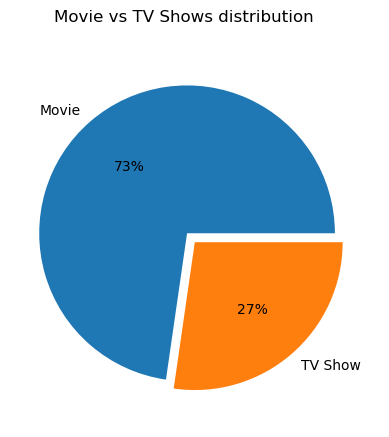

In [98]:
labels=['Movie','TV Show']
plt.pie(df_new.groupby('type')['type'].count(),labels=labels,explode=(0.08,0),autopct='%0.0f%%')
plt.suptitle('Movie vs TV Shows distribution ')
plt.show()

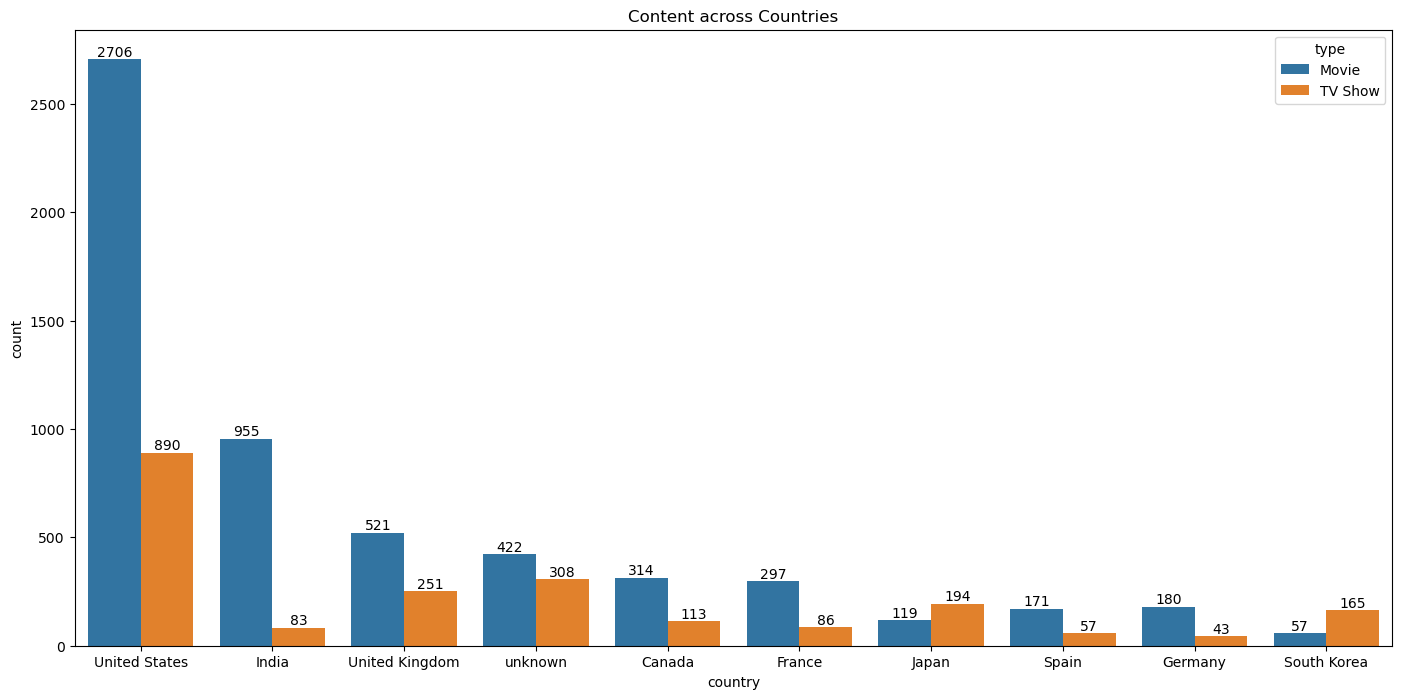

<Figure size 640x480 with 0 Axes>

In [99]:
df_temp=df_new.drop_duplicates(subset=['country','title'])
x=df_temp['country'].value_counts().head(10)
plt.figure(figsize=(17,8))
plt.title('Content across Countries')
label=sns.countplot(data=df_temp,x='country',hue='type',order=x.index)
for i in label.containers:
    label.bar_label(i)
plt.show()
plt.savefig('2.jpg')

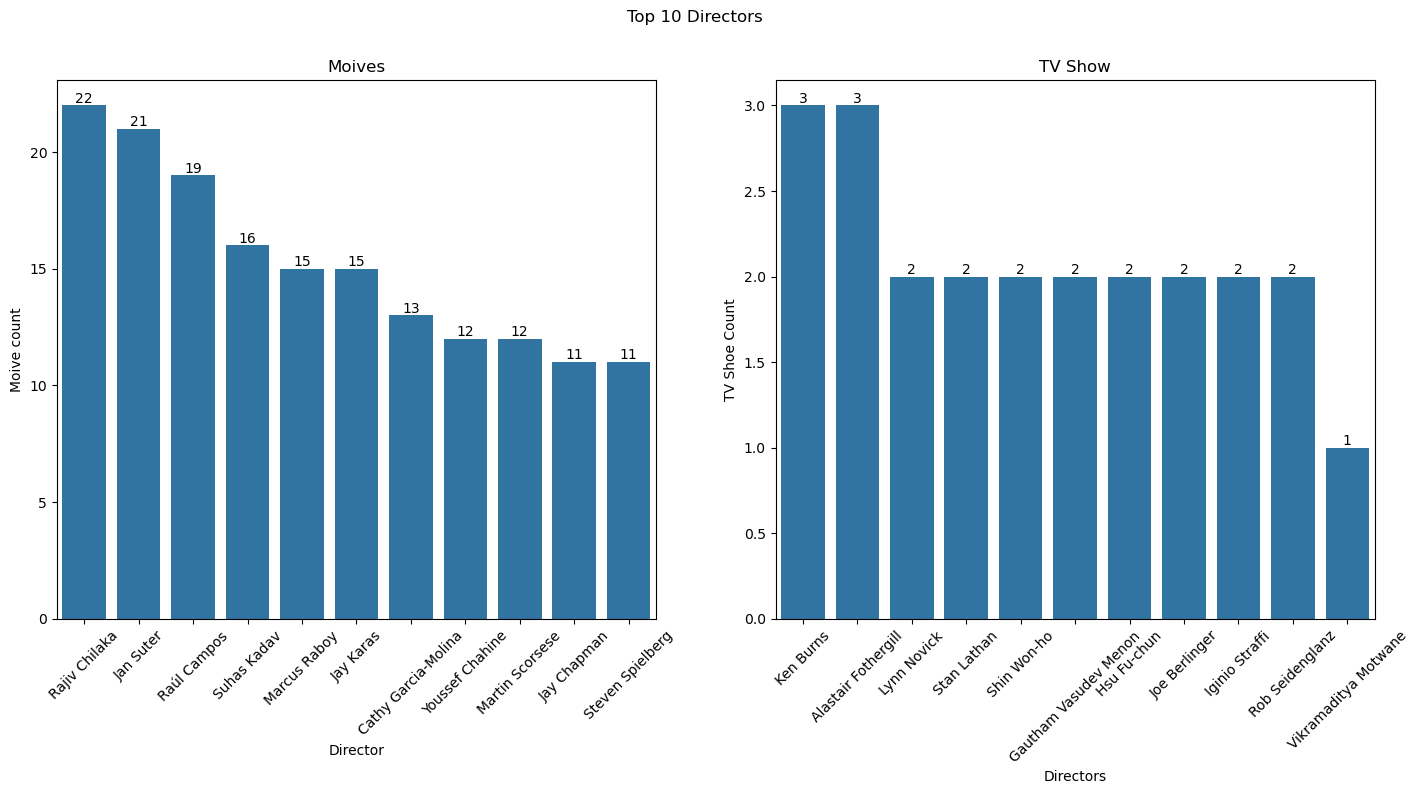

In [100]:
df_movies_temp=df_movies.drop_duplicates(subset=['director','title'])
df_Tvs_temp=df_Tvs.drop_duplicates(subset=['director','title'])

plt.figure(figsize=(17,7))
plt.suptitle('Top 10 Directors')

plt.subplot(1,2,1)
label=sns.countplot(data=df_movies_temp,x='director',
                    order=df_movies_temp['director'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title("Moives")
plt.xticks(rotation=45)
plt.xlabel('Director')
plt.ylabel('Moive count')

plt.subplot(1,2,2)
label=sns.countplot(data=df_Tvs_temp, x='director',
                    order=df_Tvs_temp['director'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title('TV Show')
plt.xticks(rotation=45)
plt.xlabel('Directors')
plt.ylabel('TV Shoe Count')
plt.show()

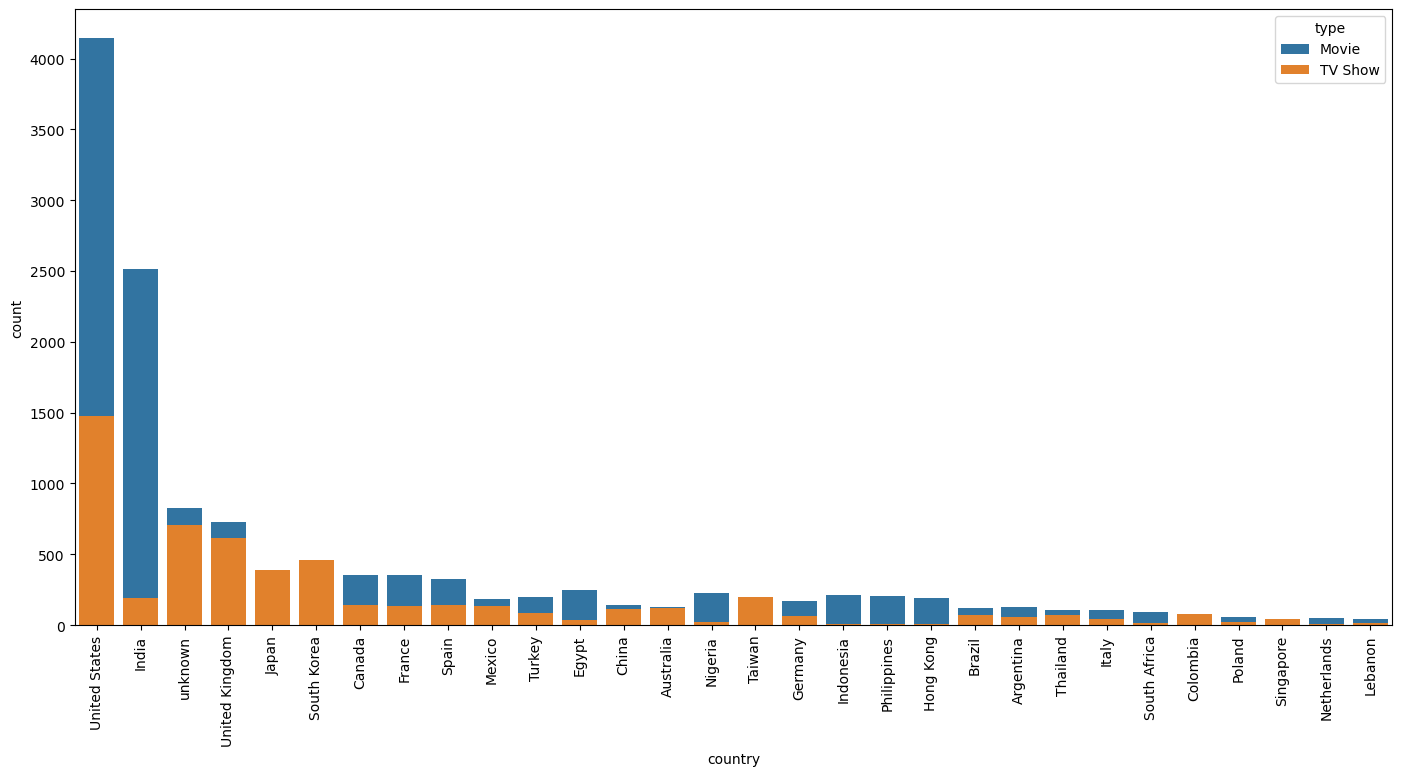

In [101]:
df_temp=df_new.drop_duplicates(subset=['genre','title'])
plt.figure(figsize=(17,8))
plt.xticks(rotation=90)
sns.countplot(data=df_temp,x='country',hue='type',dodge=False,
             order=df_temp['country'].value_counts().head(30).index)
plt.show()


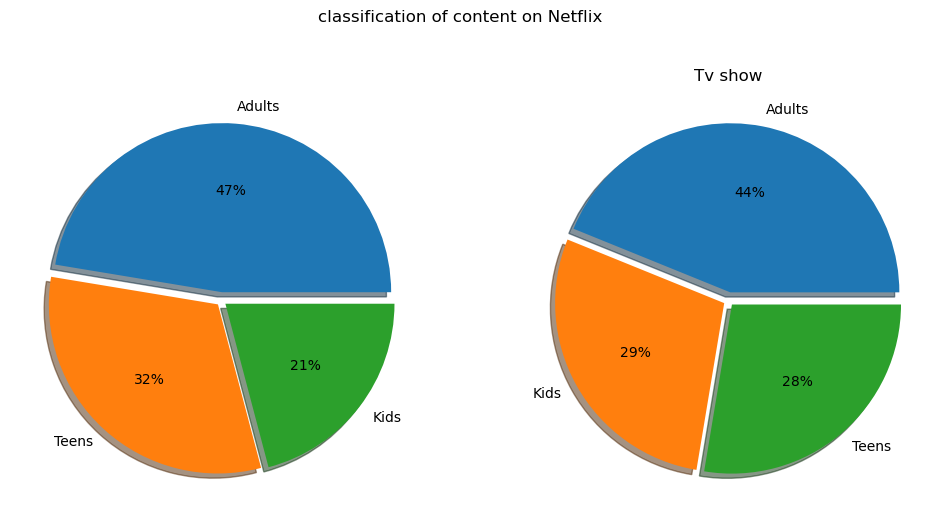

In [102]:
df_movies_temp=df_movies.drop_duplicates(subset=['rating','title'])
df_Tvs_temp=df_Tvs.drop_duplicates(subset=['rating','title'])
plt.figure(figsize=(12,6))
plt.suptitle('classification of content on Netflix')
plt.subplot(1,2,1)
plt.pie(df_movies_temp['rating'].value_counts(),labels=df_movies_temp['rating'].value_counts().index,
       autopct='%.0f%%',explode=(0.05,0.03,0.03),shadow=True)
plt.subplot(1,2,2)
plt.title('Movies')
plt.pie(df_Tvs_temp['rating'].value_counts(),labels=df_Tvs_temp['rating'].value_counts().index,
       autopct='%.0f%%',explode=(0.05,0.03,0.03),shadow=True)
plt.title('Tv show')
plt.show()

In [103]:
df_movies_temp=df_movies.drop_duplicates(subset =['year','title'])
mv_year=df_movies_temp['year'].value_counts()
mv_year.sort_index(inplace=True)
month_order=['January','February','March','April','May','June','July',
            'August','September','October','November','December']
mv_month=df_movies_temp['month_name'].value_counts().loc[month_order]
day_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
mv_day=df_movies_temp['weekday'].value_counts().loc[day_order]


In [104]:
mv_year

year
2008.0       1
2009.0       2
2011.0      13
2012.0       3
2013.0       3
2014.0      19
2015.0      51
2016.0     224
2017.0     813
2018.0    1223
2019.0    1412
2020.0    1281
2021.0     986
Name: count, dtype: int64

In [105]:
mv_day

weekday
Monday        612
Tuesday       842
Wednesday     895
Thursday     1040
Friday       1537
Saturday      543
Sunday        562
Name: count, dtype: int64

In [106]:
mv_month

month_name
January      535
February     375
March        518
April        542
May          433
June         485
July         559
August       515
September    510
October      535
November     489
December     535
Name: count, dtype: int64

Text(0.5, 1.0, 'Day wise')

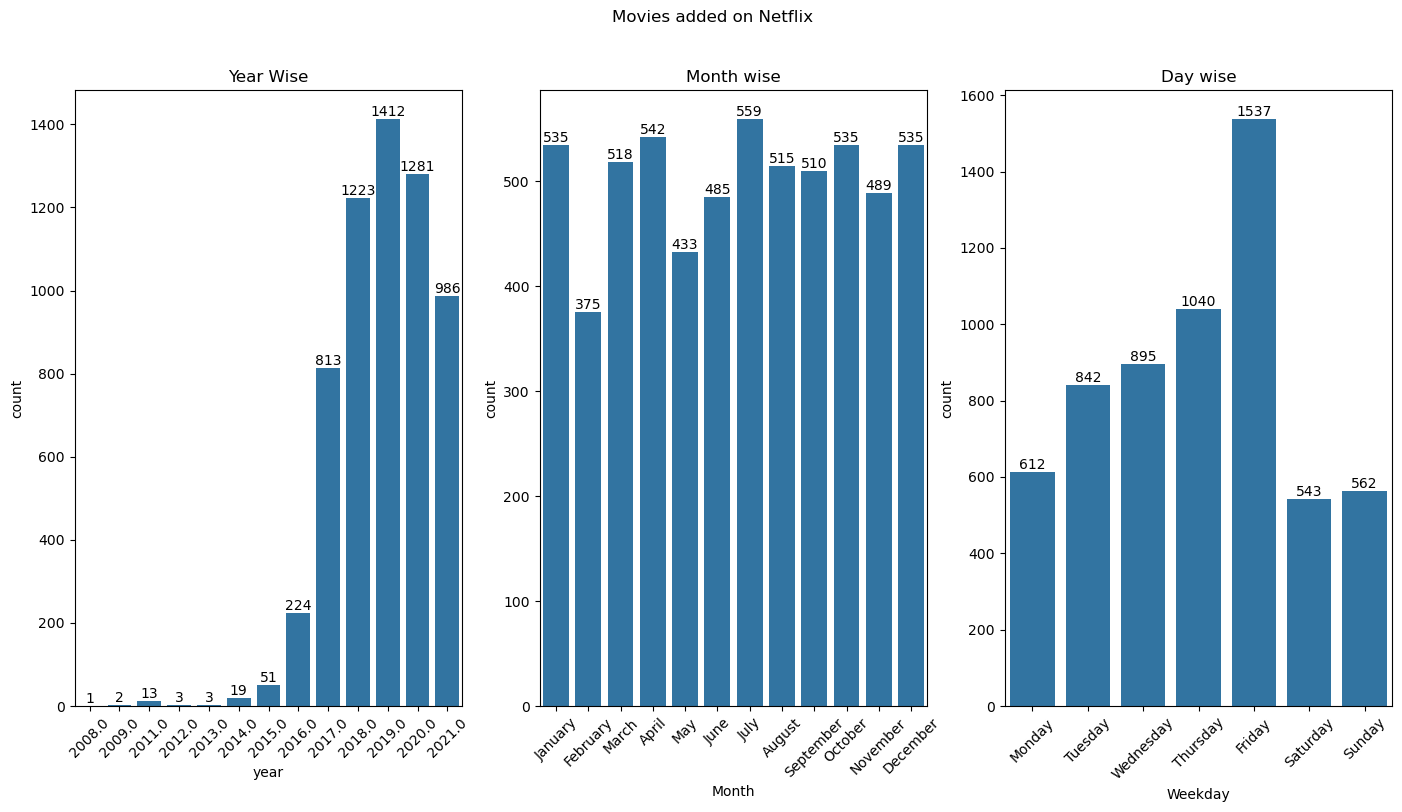

In [107]:
plt.figure(figsize=(17,8))
plt.suptitle('Movies added on Netflix')
plt.subplot(1,3,1)
label=sns.countplot(data=df_movies_temp,x='year',order=mv_year.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('year')
plt.title('Year Wise')
plt.subplot(1,3,2)
label=sns.countplot(data=df_movies_temp,x='month_name',order=mv_month.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')
plt.subplot(1,3,3)
label=sns.countplot(data=df_movies_temp,x='weekday',order=mv_day.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')


Text(0.5, 1.0, 'Day wise')

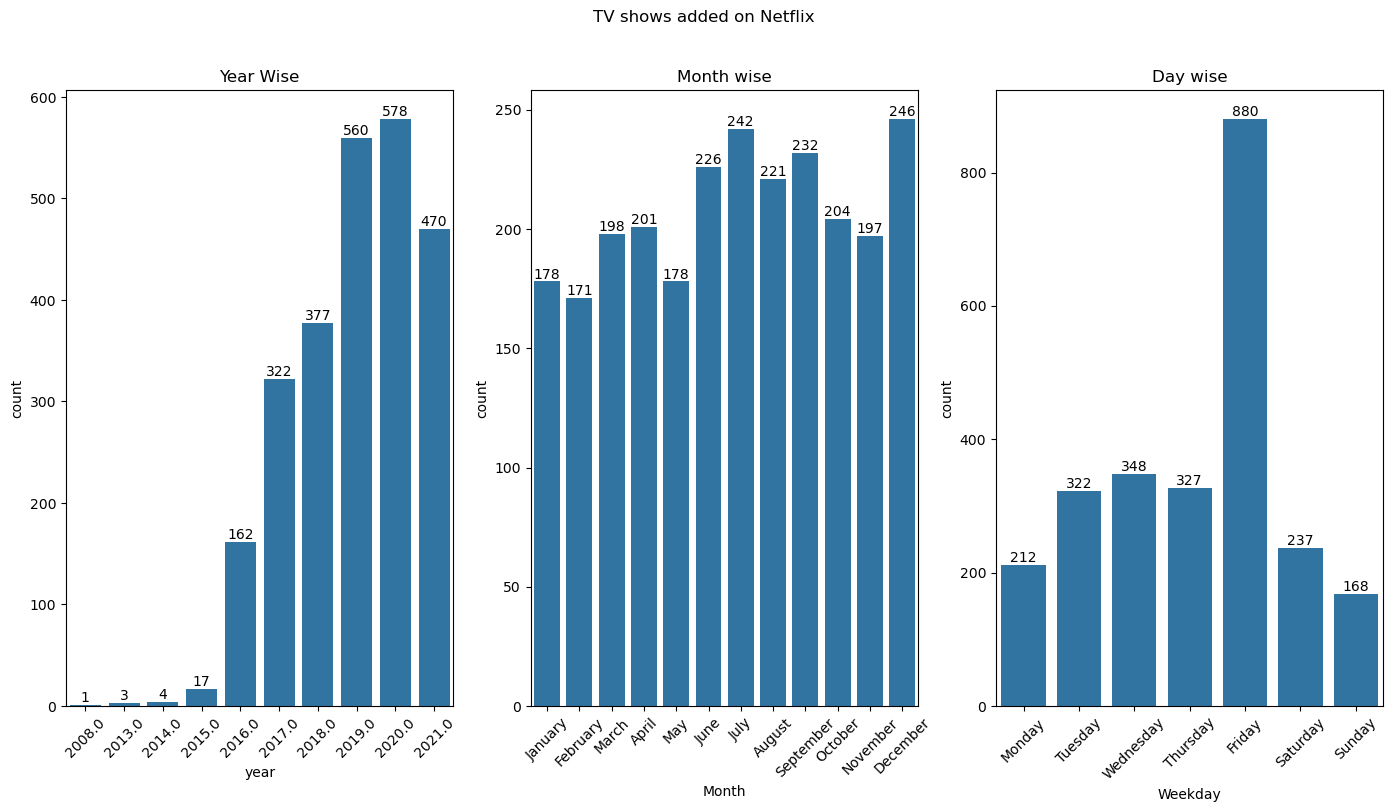

In [108]:
df_Tvs_temp=df_Tvs.drop_duplicates(subset =['year','title'])
mv_year=df_Tvs_temp['year'].value_counts()
mv_year.sort_index(inplace=True)
month_order=['January','February','March','April','May','June','July',
            'August','September','October','November','December']
mv_month=df_Tvs_temp['month_name'].value_counts().loc[month_order]
day_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
mv_day=df_Tvs_temp['weekday'].value_counts().loc[day_order]

plt.figure(figsize=(17,8))
plt.suptitle('TV shows added on Netflix')
plt.subplot(1,3,1)
label=sns.countplot(data=df_Tvs_temp,x='year',order=mv_year.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('year')
plt.title('Year Wise')
plt.subplot(1,3,2)
label=sns.countplot(data=df_Tvs_temp,x='month_name',order=mv_month.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')
plt.subplot(1,3,3)
label=sns.countplot(data=df_Tvs_temp,x='weekday',order=mv_day.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')

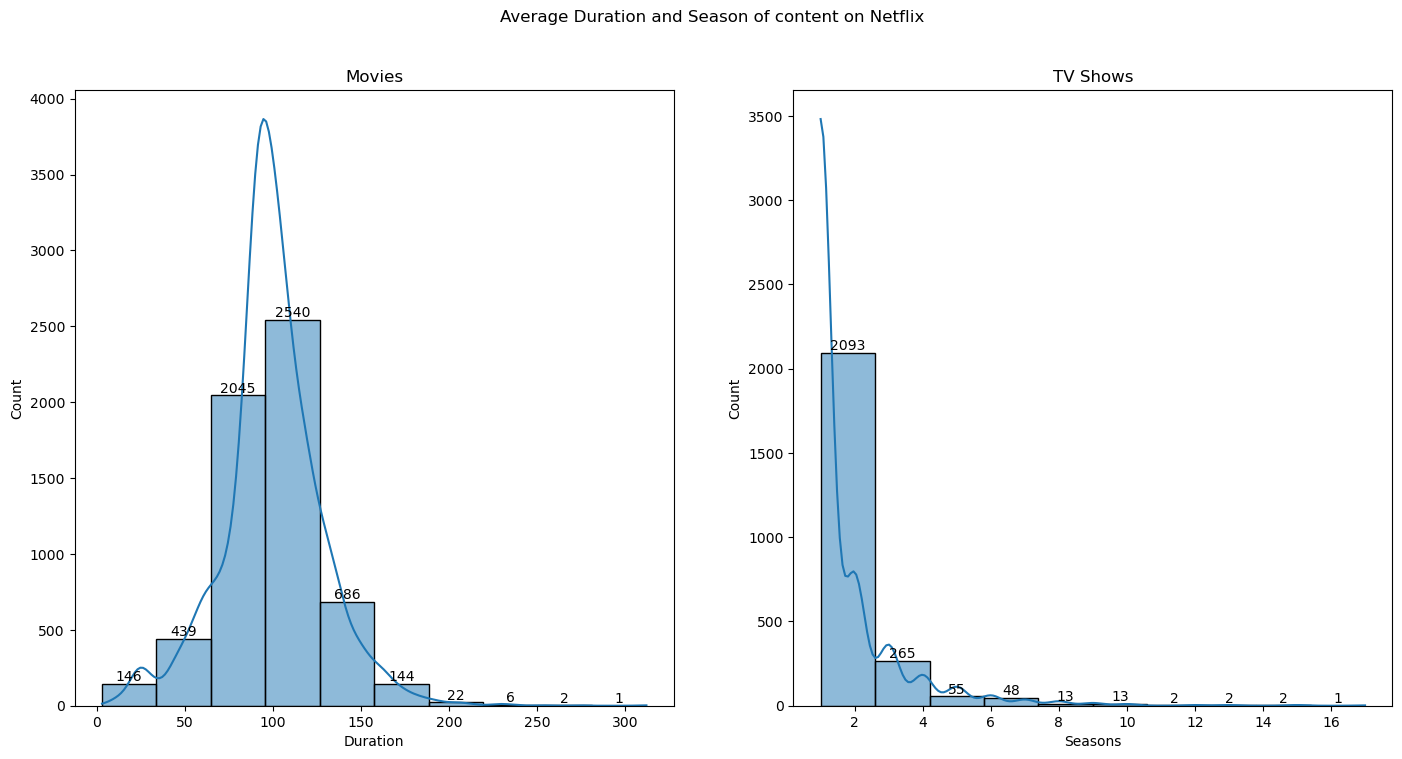

In [110]:
df_movies_temp=df_movies.drop_duplicates(subset=['duration','title'])
df_Tvs_temp=df_Tvs.drop_duplicates(subset=['seasons','title'])

plt.figure(figsize=(17,8))
plt.suptitle('Average Duration and Season of content on Netflix')

plt.subplot(1,2,1)
label=sns.histplot(df_movies_temp['duration'].astype(int),bins=10,kde=True)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Duration')
plt.title('Movies')

plt.subplot(1,2,2)
label=sns.histplot(df_Tvs_temp['seasons'].astype(int),bins=10,kde=True)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Seasons')
plt.title('TV Shows')
plt.show()

C:\Users\welcome\AppData\Local\Temp\ipykernel_5268\797887890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_temp['duration']=df_movies_temp['duration'].astype(int)
C:\Users\welcome\AppData\Local\Temp\ipykernel_5268\797887890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Tvs_temp['seasons']=df_Tvs_temp['seasons'].astype(int)


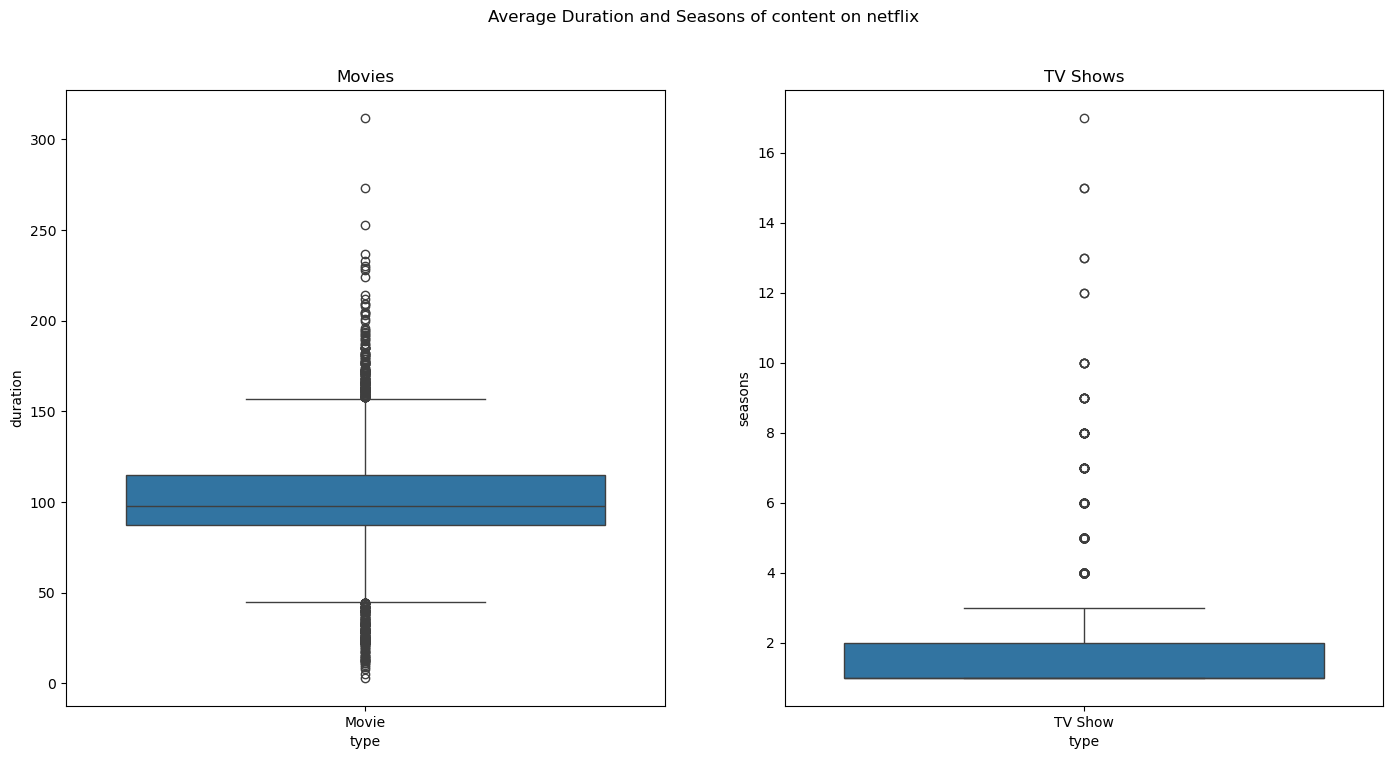

In [114]:
df_movies_temp['duration']=df_movies_temp['duration'].astype(int)
df_Tvs_temp['seasons']=df_Tvs_temp['seasons'].astype(int)

plt.figure(figsize=(17,8))
plt.suptitle('Average Duration and Seasons of content on netflix')

plt.subplot(1,2,1)
sns.boxplot(df_movies_temp, x='type', y='duration')
plt.title('Movies')

plt.subplot(1,2,2)
sns.boxplot(df_Tvs_temp, x='type', y='seasons')
plt.title('TV Shows')
plt.show()

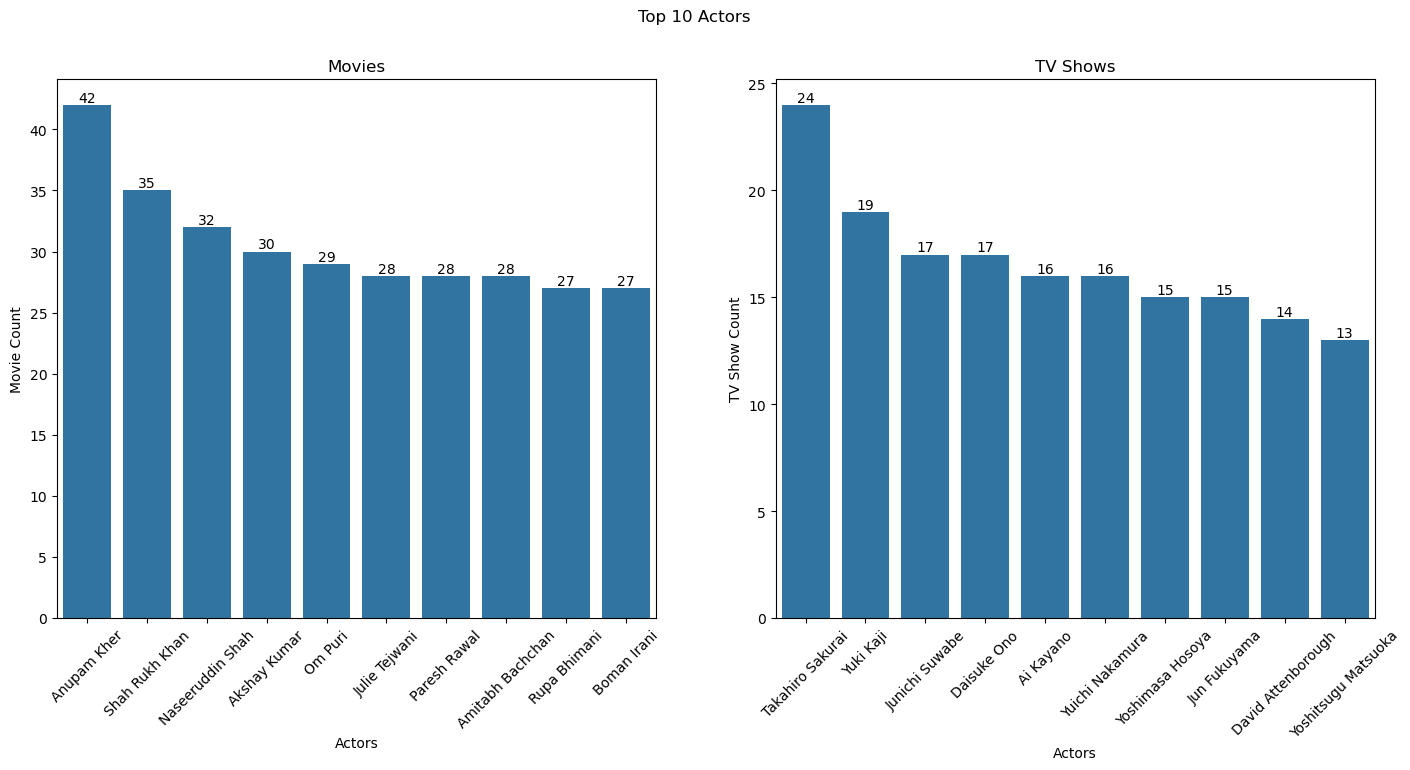

In [115]:
df_movies_temp=df_movies.drop_duplicates(subset=['cast','title'])
df_Tvs_temp=df_Tvs.drop_duplicates(subset=['cast','title'])

plt.figure(figsize=(17,7))
plt.suptitle('Top 10 Actors')

plt.subplot(1,2,1)
label=sns.countplot(data=df_movies_temp,x='cast',
                   order=df_movies_temp['cast'].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title('Movies')
plt.xticks(rotation=45)
plt.xlabel('Actors')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label=sns.countplot(data=df_Tvs_temp,x='cast',
                   order=df_Tvs_temp['cast'].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title('TV Shows')
plt.xticks(rotation=45)
plt.xlabel('Actors')
plt.ylabel('TV Show Count')

plt.show()

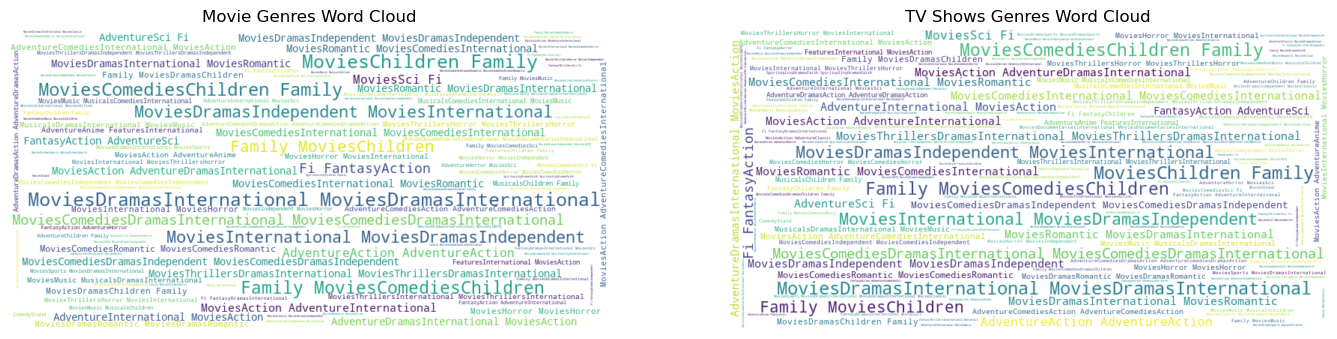

In [112]:
from wordcloud import WordCloud

genre_text=''.join(df_movies['genre'])
wordcloud=WordCloud(width=800, height= 400, background_color='white').generate(genre_text)
plt.figure(figsize=(17,10))
plt.subplot(1,2,1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Movie Genres Word Cloud')

genre=''.join(df_Tvs['genre'])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(genre_text)
plt.subplot(1,2,2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('TV Shows Genres Word Cloud')
plt.show()

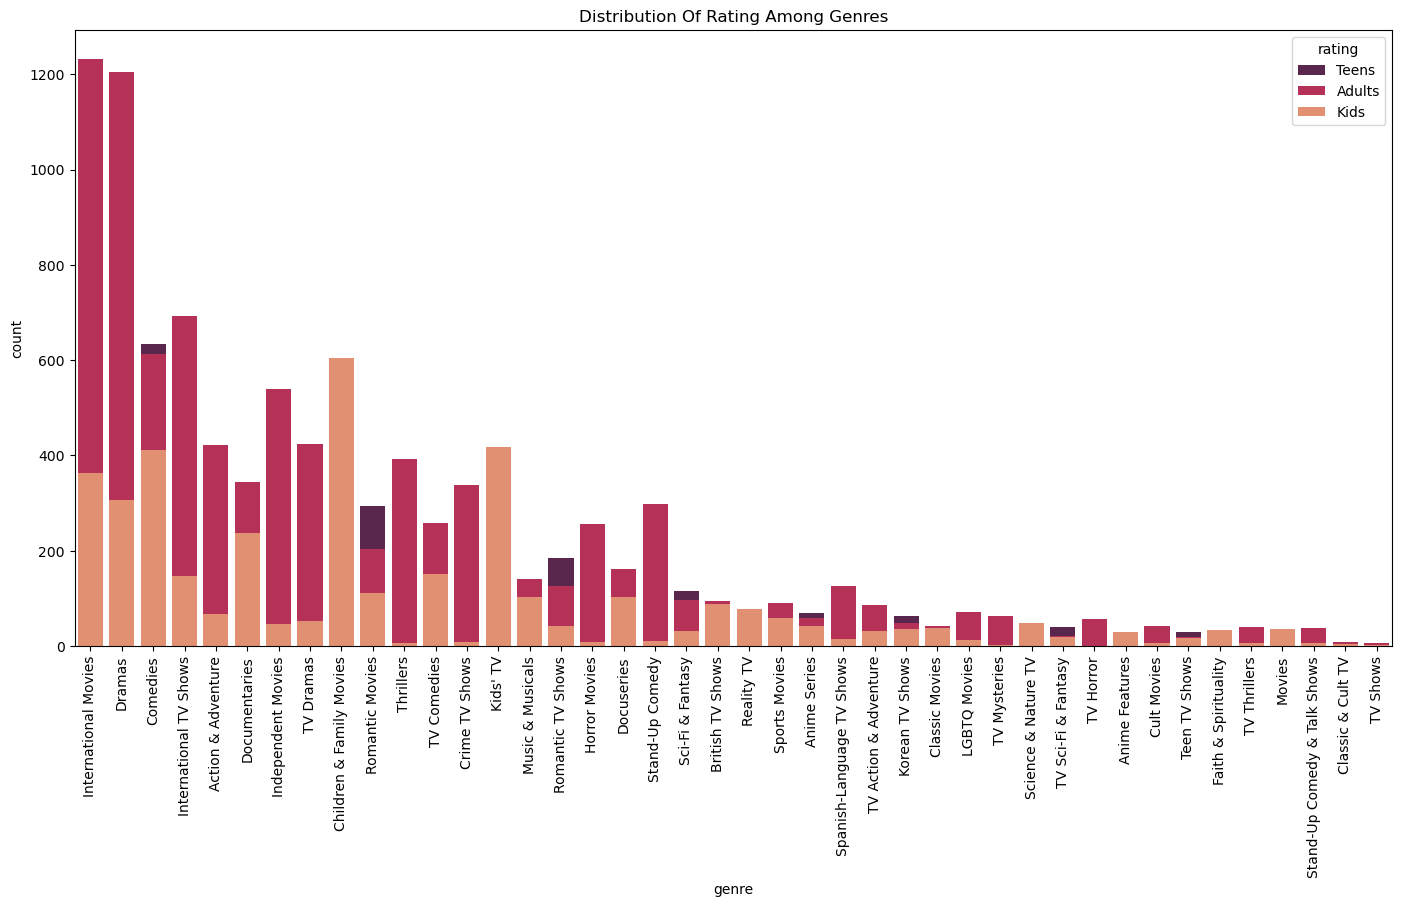

In [116]:
df_temp=df_new.drop_duplicates(subset=['genre','title'])
plt.figure(figsize=(17,8))
plt.title('Distribution Of Rating Among Genres')
sns.countplot(data=df_temp, x='genre',hue='rating',dodge=False,order=df_temp['genre'].value_counts().index, palette='rocket')
plt.xticks(rotation=90)
plt.show()

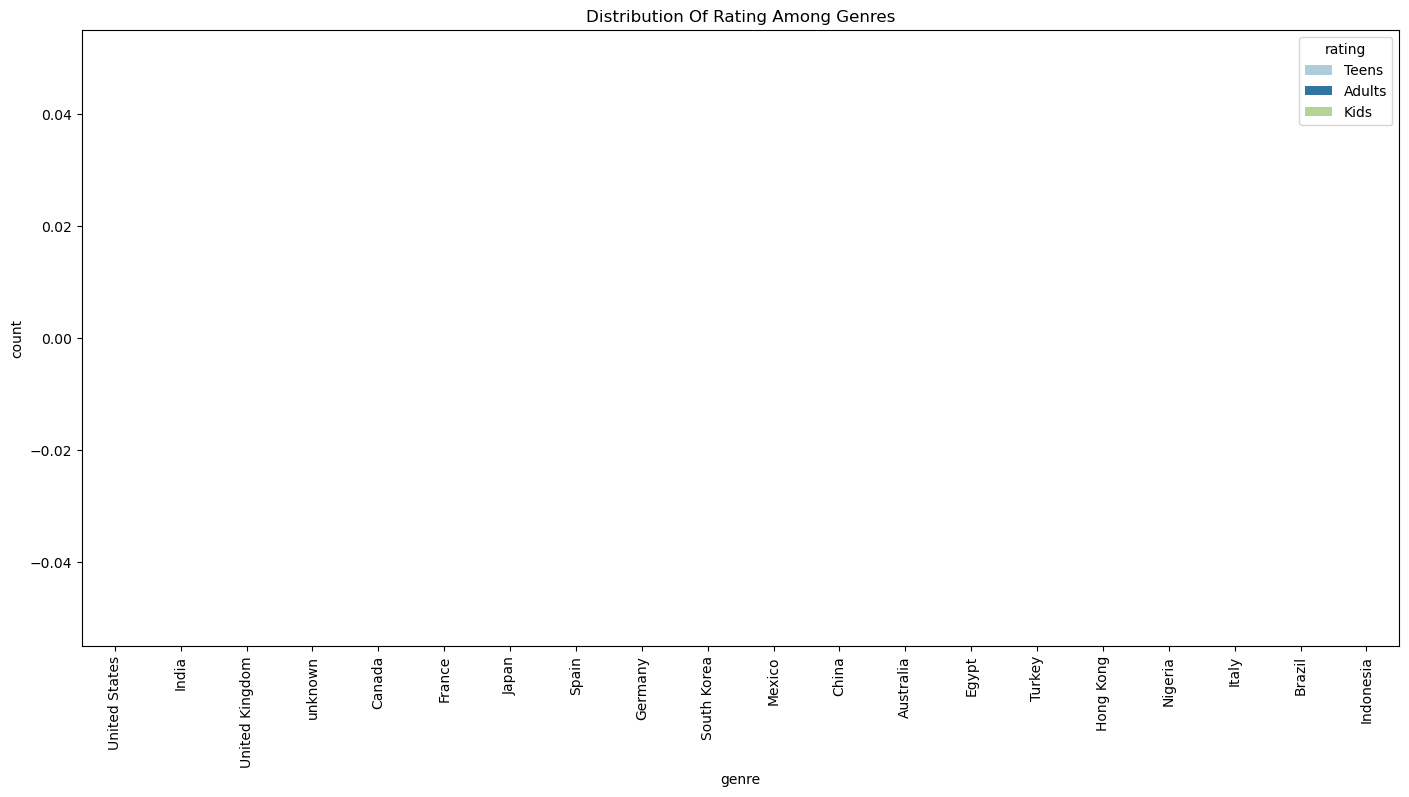

In [119]:
df_temp=df_new.drop_duplicates(subset=['country','title'])
plt.figure(figsize=(17,8))
plt.title('Distribution Of Rating Among Genres')
sns.countplot(data=df_temp, x='genre',hue='rating',dodge=False,order=df_temp['country'].value_counts().head(20).index, palette='Paired')
plt.xticks(rotation=90)
plt.show()